# This script contains the following:¶
1. Importing your libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Federal Reserve Economic Data
# Bonus task
1. Defining Your Parameters
2. Splitting the Data
3. Running and Fitting the Model
4. Iterating

# importing libraries and data

In [3]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [4]:
#folder shortcut
path = r'C:\Users\hp\Documents\Citi Bike'

In [5]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_7.csv'), index_col = False)

# making sure ride start date is date time

In [6]:
# Define data types for specific columns
data_types = {
    'ride_start_date': 'datetime64'
}

In [7]:
file_path = os.path.join(path, '02 Data','prepared data','citi_7.csv')

In [8]:
parse_dates = ['ride_start_date']

In [9]:
citi = pd.read_csv(file_path, parse_dates=parse_dates)

In [10]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41017 entries, 0 to 41016
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               41017 non-null  int64         
 1   day_of_week              41017 non-null  object        
 2   start_hour               41017 non-null  int64         
 3   start_station_id         41017 non-null  int64         
 4   start_station_name       41017 non-null  object        
 5   start_station_latitude   41017 non-null  float64       
 6   start_station_longitude  41017 non-null  float64       
 7   end_station_id           41017 non-null  int64         
 8   end_station_name         41017 non-null  object        
 9   end_station_latitude     41017 non-null  float64       
 10  end_station_longitude    41017 non-null  float64       
 11  trip_duration            41017 non-null  int64         
 12  subscriber               41017 n

# cleaning wrangling subsetting

In [11]:
#ride counts by day
day_counts = citi.groupby( citi['ride_start_date'].dt.date)['ride_start_date'].count()

In [12]:
day_counts

ride_start_date
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
2013-09-06    1452
2013-09-07    1134
2013-09-08    1129
2013-09-09    1393
2013-09-10    1579
2013-09-11    1532
2013-09-12    1339
2013-09-13    1630
2013-09-14    1129
2013-09-15    1169
2013-09-16    1291
2013-09-17    1596
2013-09-18    1600
2013-09-19    1578
2013-09-20    1703
2013-09-21    1165
2013-09-22    1061
2013-09-23    1498
2013-09-24    1662
2013-09-25    1598
2013-09-26    1683
2013-09-27    1535
2013-09-28    1248
2013-09-29    1102
2013-09-30    1602
Name: ride_start_date, dtype: int64

In [13]:
#avg duration trip on day
avg_ride_duration_day = citi.groupby('ride_start_date')['trip_duration'].mean()

In [14]:
avg_ride_duration_day

ride_start_date
2013-09-01    735.274348
2013-09-02    675.447740
2013-09-03    686.549962
2013-09-04    713.929204
2013-09-05    712.066327
2013-09-06    693.772039
2013-09-07    731.380952
2013-09-08    736.000000
2013-09-09    691.850682
2013-09-10    687.388220
2013-09-11    674.304830
2013-09-12    671.300971
2013-09-13    688.204294
2013-09-14    691.806023
2013-09-15    722.729683
2013-09-16    680.896979
2013-09-17    681.016291
2013-09-18    680.636875
2013-09-19    687.445501
2013-09-20    691.693482
2013-09-21    700.793133
2013-09-22    720.921772
2013-09-23    699.183578
2013-09-24    680.915162
2013-09-25    701.739675
2013-09-26    680.911468
2013-09-27    711.543974
2013-09-28    719.056090
2013-09-29    704.512704
2013-09-30    690.719725
Name: trip_duration, dtype: float64

In [15]:
#merging together
result = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': avg_ride_duration_day.values})

In [16]:
result

,date,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327
5,2013-09-06,1452,693.772039
6,2013-09-07,1134,731.380952
7,2013-09-08,1129,736.000000
8,2013-09-09,1393,691.850682
9,2013-09-10,1579,687.388220


In [17]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [18]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,ride_count,avg_duration
datetime,,
2013-09-01,729,735.274348
2013-09-02,708,675.447740
2013-09-03,1331,686.549962
2013-09-04,1469,713.929204
2013-09-05,1372,712.066327


# i selected these data points because this is the first month of citi bike.  hopefully this can look at trends of how many rides will occur in the second month.  I also did trip duration to see if there is something there to play with down the line.  But my current main focus is date and ride_count

In [19]:
# Reset index so that you can use the "Date" column as a filter

result_2 = result.reset_index()

In [20]:
result_2.head()

,datetime,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327


In [21]:
result_3 = result_2[['datetime','ride_count']]

In [22]:
result_3

,datetime,ride_count
0,2013-09-01,729
1,2013-09-02,708
2,2013-09-03,1331
3,2013-09-04,1469
4,2013-09-05,1372
5,2013-09-06,1452
6,2013-09-07,1134
7,2013-09-08,1129
8,2013-09-09,1393
9,2013-09-10,1579


In [23]:
# Reset index so that you can use the "Date" column as a filter

result_3 = result.reset_index()

In [24]:
result_3

,datetime,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327
5,2013-09-06,1452,693.772039
6,2013-09-07,1134,731.380952
7,2013-09-08,1129,736.000000
8,2013-09-09,1393,691.850682
9,2013-09-10,1579,687.388220


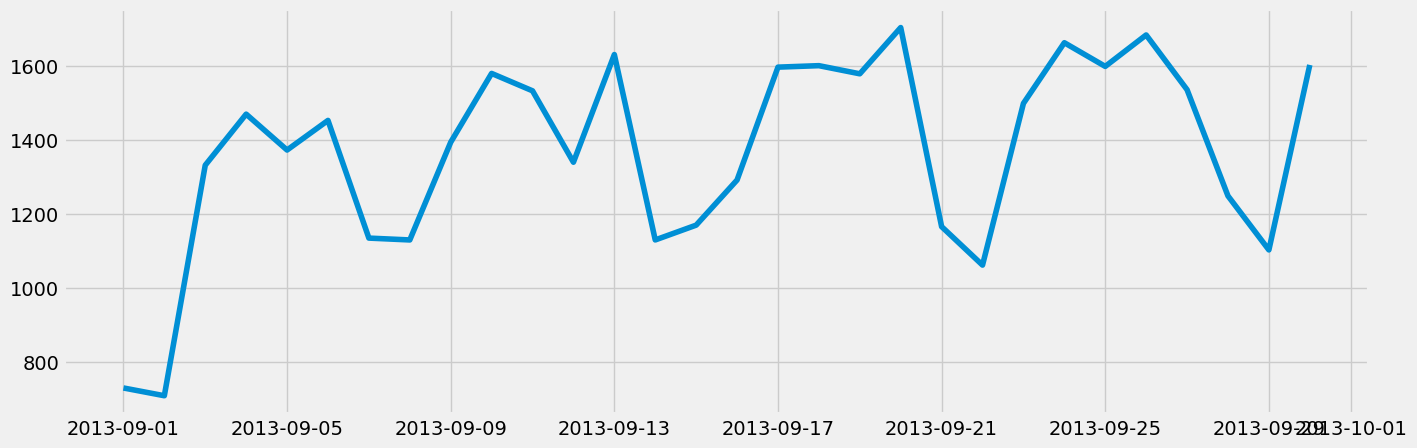

In [25]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

In [26]:
# it looks like there is some autocorrleation on the ride count depending on the day

In [27]:
day_counts

ride_start_date
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
2013-09-06    1452
2013-09-07    1134
2013-09-08    1129
2013-09-09    1393
2013-09-10    1579
2013-09-11    1532
2013-09-12    1339
2013-09-13    1630
2013-09-14    1129
2013-09-15    1169
2013-09-16    1291
2013-09-17    1596
2013-09-18    1600
2013-09-19    1578
2013-09-20    1703
2013-09-21    1165
2013-09-22    1061
2013-09-23    1498
2013-09-24    1662
2013-09-25    1598
2013-09-26    1683
2013-09-27    1535
2013-09-28    1248
2013-09-29    1102
2013-09-30    1602
Name: ride_start_date, dtype: int64

In [28]:
# Check for missing values 

day_counts.isnull().sum() 

np.int64(0)

# time series analysis - decomposition

In [29]:
result

,ride_count,avg_duration
datetime,,
2013-09-01,729,735.274348
2013-09-02,708,675.447740
2013-09-03,1331,686.549962
2013-09-04,1469,713.929204
2013-09-05,1372,712.066327
2013-09-06,1452,693.772039
2013-09-07,1134,731.380952
2013-09-08,1129,736.000000
2013-09-09,1393,691.850682


In [30]:
# dropping a column
column_to_drop = 'avg_duration'

In [31]:
result = result.drop(column_to_drop, axis=1)

In [32]:
result

,ride_count
datetime,
2013-09-01,729
2013-09-02,708
2013-09-03,1331
2013-09-04,1469
2013-09-05,1372
2013-09-06,1452
2013-09-07,1134
2013-09-08,1129
2013-09-09,1393


In [33]:
# Reset index so that you can use the "Date" column as a filter

result_1 = result.reset_index()

In [34]:
result_1

,datetime,ride_count
0,2013-09-01,729
1,2013-09-02,708
2,2013-09-03,1331
3,2013-09-04,1469
4,2013-09-05,1372
5,2013-09-06,1452
6,2013-09-07,1134
7,2013-09-08,1129
8,2013-09-09,1393
9,2013-09-10,1579


In [35]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    30 non-null     datetime64[ns]
 1   ride_count  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 612.0 bytes


In [36]:
time_series = result_1['ride_count']

In [37]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [38]:
result_1.set_index('datetime', inplace=True)

In [39]:
result_1.index.freq = 'D'

In [40]:
time_series = result_1['ride_count']

In [41]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')


In [42]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

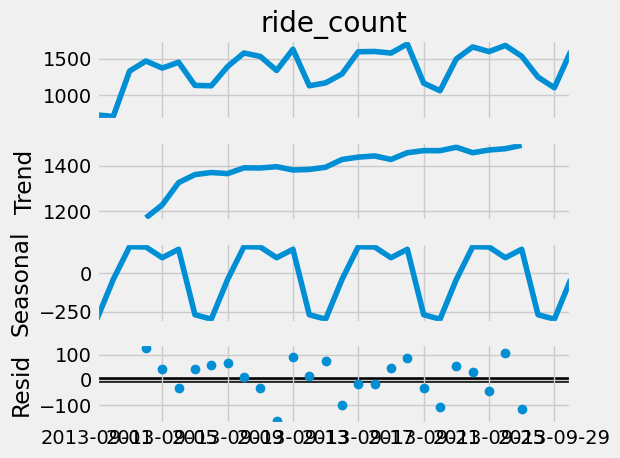

In [43]:
# Plot the separate components

decomposition.plot()
plt.show()

In [44]:
result_1

,ride_count
datetime,
2013-09-01,729
2013-09-02,708
2013-09-03,1331
2013-09-04,1469
2013-09-05,1372
2013-09-06,1452
2013-09-07,1134
2013-09-08,1129
2013-09-09,1393


# the level and the trend are different which tells me it needs smoothing
# the trend is increasing which means there are more riders as the month goes on.
# there certainly appears to have an element of of seasonality and there is a good amount of noise as well

# testing for stationarity

In [45]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.728335
p-value                         0.003732
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


### the P value is very signifigant

the null hypothesis which is what we are trying to disprove is the presense of a unit root. I want to disprove there is a unit root which would mean that the data is stationary.  The presense of a unit root would mean the data is non stationary which is something we dont want. 

when comparing the test statistic to the critical value - my test statistic is smaller than the ciritical value at the 5 and 10 % value and i have a satifactory p value

In [46]:
# it doesnt look like I need to perform differencing

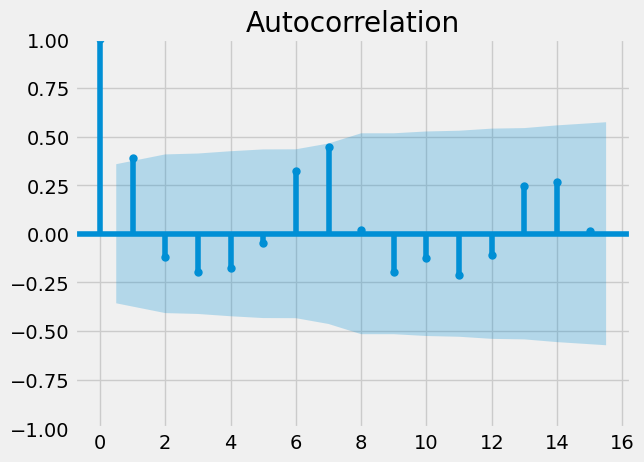

In [47]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

In [48]:
# saving to csv
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_8.csv'))

# BONUS TASK

In [49]:
data_diff = result_1- result_1.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [50]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [51]:
data_diff.head()

,ride_count
datetime,
2013-09-02,-21.0
2013-09-03,623.0
2013-09-04,138.0
2013-09-05,-97.0
2013-09-06,80.0


In [52]:
data_diff.columns

Index(['ride_count'], dtype='object')

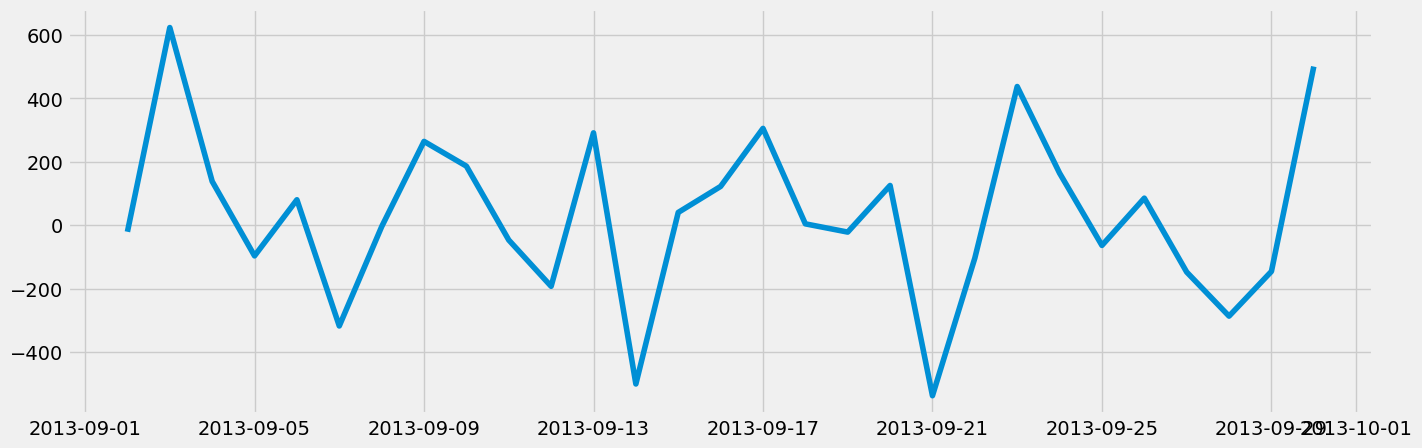

In [53]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [54]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.726936
p-value                         0.069492
Number of Lags Used             9.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


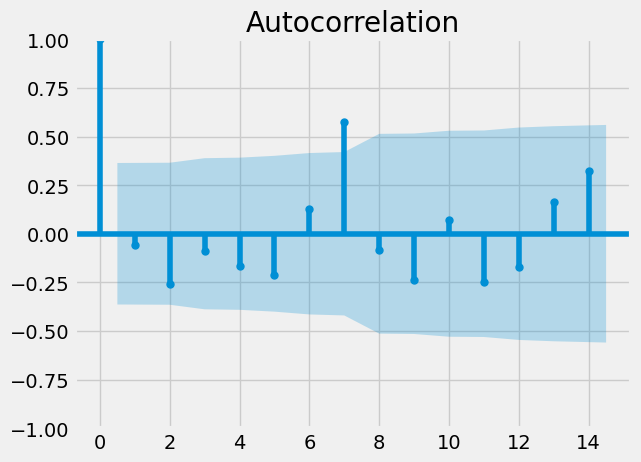

In [55]:
plot_acf(data_diff)
plt.show()

# i feel like the numbers were better before differencing 

In [56]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2013-09-01 to 2013-09-30
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ride_count  30 non-null     int64
dtypes: int64(1)
memory usage: 480.0 bytes


In [57]:
result_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      30 non-null     datetime64[ns]
 1   ride_count    30 non-null     int64         
 2   avg_duration  30 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 852.0 bytes


In [58]:
result_4= result_3.drop(column_to_drop, axis=1)

In [59]:
# Reset index so that you can use the "Date" column as a filter

result_4 = result_4.reset_index()

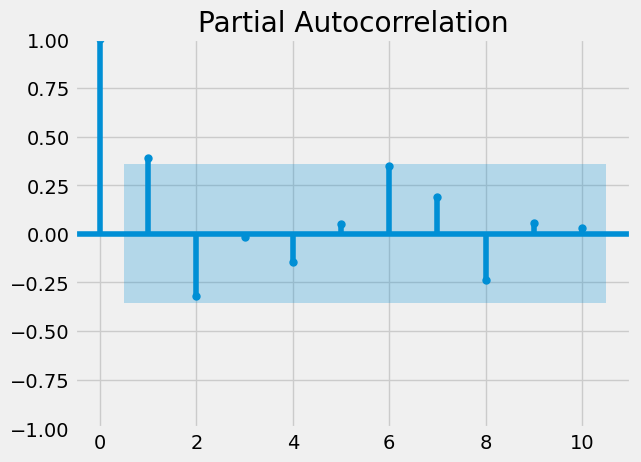

<Figure size 4500x4500 with 0 Axes>

In [60]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(result_1['ride_count'], lags=10)  # Adjust the number of lags as needed
plt.figure(figsize=(15, 15), dpi=300)
plt.show()

In [61]:
# 4?

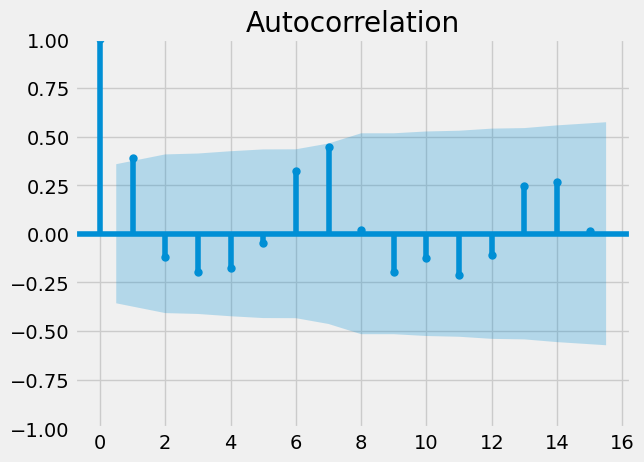

<Figure size 1500x500 with 0 Axes>

In [62]:
# Plot autocorrelations to determine parameter q

plot_acf(result_1)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

# 3?

In [63]:
# Split the data

train = result_1['ride_count'][:24]
test = result_1['ride_count'][23:]

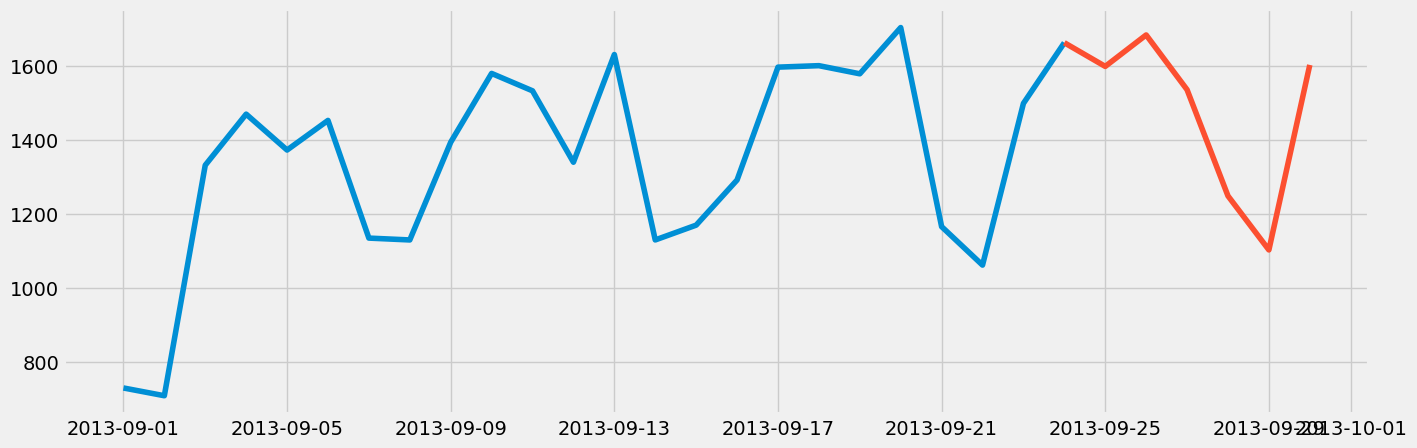

In [64]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [65]:
test.shape

(7,)

# run and fit model

In [66]:
from statsmodels.tsa.api import ARIMA # Import the model you need

In [67]:
from statsmodels.tsa.arima_model import ARMA

                               SARIMAX Results                                
Dep. Variable:             ride_count   No. Observations:                   24
Model:                 ARIMA(4, 0, 3)   Log Likelihood                -161.963
Date:                Wed, 24 Jul 2024   AIC                            341.926
Time:                        18:49:58   BIC                            352.528
Sample:                    09-01-2013   HQIC                           344.738
                         - 09-24-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1344.4120     46.452     28.942      0.000    1253.368    1435.456
ar.L1          0.6834      0.344      1.988      0.047       0.010       1.357
ar.L2         -0.1725      0.248     -0.694      0.4

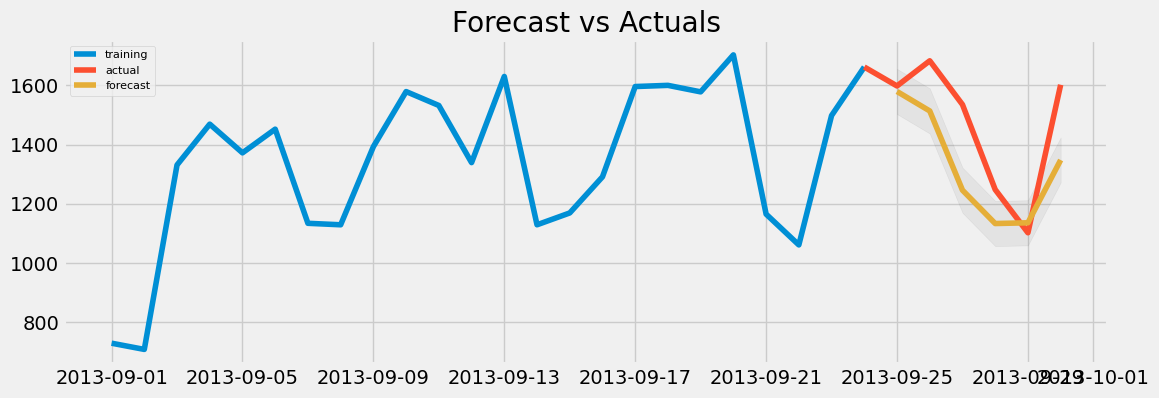

In [68]:
model = ARIMA(train, order=(4,0,3))  # Replace p, d, and q with appropriate values
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# iterating

                               SARIMAX Results                                
Dep. Variable:             ride_count   No. Observations:                   24
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -160.906
Date:                Wed, 24 Jul 2024   AIC                            339.812
Time:                        18:50:17   BIC                            350.415
Sample:                    09-01-2013   HQIC                           342.625
                         - 09-24-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1342.9658    168.870      7.953      0.000    1011.987    1673.944
ar.L1          0.3891      0.277      1.402      0.161      -0.155       0.933
ar.L2         -0.2598      0.352     -0.738      0.4

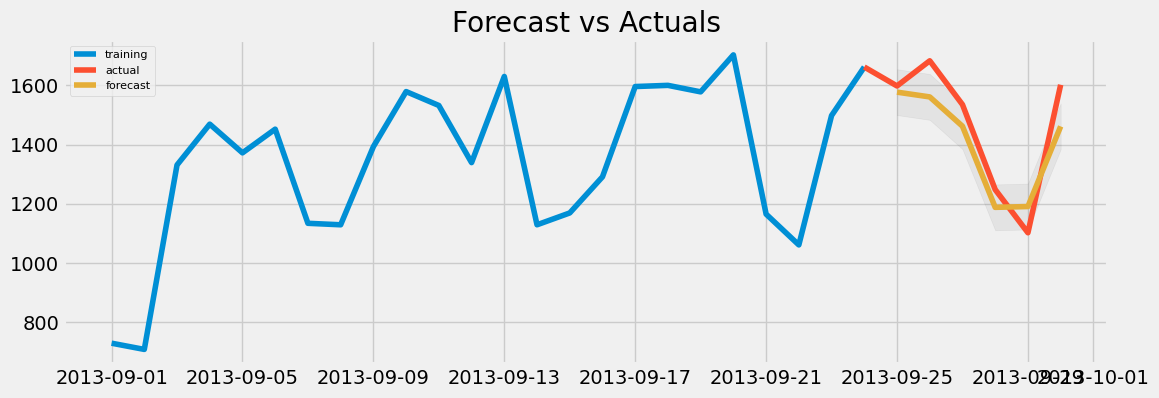

In [69]:
model = ARIMA(train, order=(7,0,0))  # Replace p, d, and q with appropriate values
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# i did about 10+ iterations and this one looks close in terms of the confidence level, but the coefficients dont really read as signifigant